In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
path = '/kaggle/input/dogs-vs-cats/train/train/'
filenames = os.listdir(path)

In [3]:
len(filenames)

25000

In [4]:
labels = [i[:3] for i in filenames]
df = pd.DataFrame({'FILENAME':filenames,'LABEL':labels})
df.head()

,FILENAME,LABEL
0,cat.12461.jpg,cat
1,dog.3443.jpg,dog
2,dog.7971.jpg,dog
3,dog.10728.jpg,dog
4,dog.1942.jpg,dog


In [5]:
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-10-25 09:53:39.647935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761386019.670869     122 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761386019.677514     122 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
data_gen = ImageDataGenerator(rotation_range=.2,
                              horizontal_flip=True, 
                              rescale=1/255,
                             validation_split=0.3)

In [7]:
# Step 2: Create train generator
train_gen = data_gen.flow_from_dataframe(
    df,
    directory=path,
    x_col='FILENAME',
    y_col='LABEL',
    target_size=(224, 224),
    subset='training',    # specify subset
    shuffle=True,
    batch_size=32
)

Found 17500 validated image filenames belonging to 2 classes.


In [8]:
# Step 3: Create validation generator
val_gen = data_gen.flow_from_dataframe(
    df,
    directory=path,
    x_col='FILENAME',
    y_col='LABEL',
    target_size=(224, 224),
    subset='validation',  # specify subset
    shuffle=False,
    batch_size=32
)

Found 7500 validated image filenames belonging to 2 classes.


In [9]:
train_gen.class_indices

{'cat': 0, 'dog': 1}

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(256,(5,5),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761386149.991412     122 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761386149.992067     122 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [ ]:
model.summary()

In [12]:
# Step 4: Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1761386173.730239     175 service.cc:148] XLA service 0x7ae12c104ca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761386173.731153     175 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761386173.731174     175 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761386173.996777     175 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/547 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.5000 - loss: 0.7024  

I0000 00:00:1761386179.177217     175 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


547/547 ━━━━━━━━━━━━━━━━━━━━ 407s 732ms/step - accuracy: 0.5718 - loss: 0.6750 - val_accuracy: 0.7313 - val_loss: 0.5478
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 260s 476ms/step - accuracy: 0.7496 - loss: 0.5120 - val_accuracy: 0.8059 - val_loss: 0.4375
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 266s 486ms/step - accuracy: 0.8147 - loss: 0.4103 - val_accuracy: 0.8635 - val_loss: 0.3101
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 263s 481ms/step - accuracy: 0.8609 - loss: 0.3195 - val_accuracy: 0.8820 - val_loss: 0.2943
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 269s 492ms/step - accuracy: 0.8889 - loss: 0.2669 - val_accuracy: 0.9115 - val_loss: 0.2118
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 266s 486ms/step - accuracy: 0.9067 - loss: 0.2209 - val_accuracy: 0.9200 - val_loss: 0.1981
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 266s 487ms/step - accuracy: 0.9278 - loss: 0.1817 - val_accuracy: 0.8856 - val_loss: 0.2976
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 275s 503ms/step - accuracy: 0.9337 - loss: 0.16

In [13]:
import matplotlib.pyplot as plt

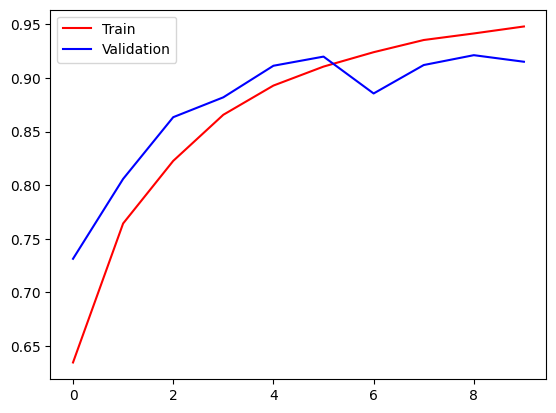

In [14]:
plt.plot(history.history['accuracy'],color='red',label='Train')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation')
plt.legend()
plt.show()

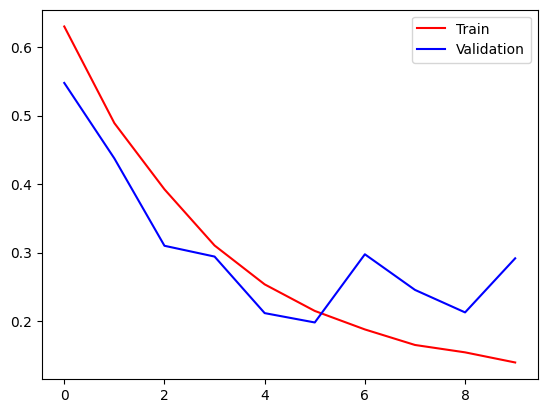

In [15]:
plt.plot(history.history['loss'],color='red',label='Train')
plt.plot(history.history['val_loss'],color='blue',label='Validation')
plt.legend()
plt.show()

In [ ]:
# Ways to avoid overfitting
# 1. Data Augumentation
# 2. Early stopping
# 3. Regularization
# 4. Batch Normalization
# 5. Drop out

In [16]:
# Unseen Data
import cv2

In [17]:
test_img = cv2.imread('/kaggle/input/images/Screenshot 2025-10-25 154801.png')

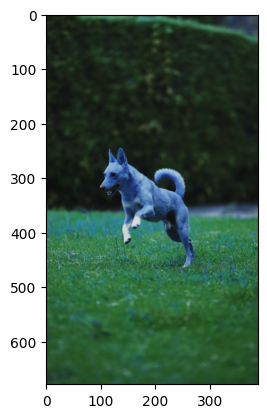

In [18]:
plt.imshow(test_img)

In [19]:
test_img.shape

(679, 389, 3)

In [20]:
test_img = cv2.resize(test_img,(224,224))

In [21]:
test_input = test_img.reshape((1,224,224,3))

In [24]:
import numpy as np

prediction = model.predict(test_input)
class_names = ['Cat 🐱', 'Dog 🐶']

predicted_class = np.argmax(prediction)  # index of max value
print("Predicted:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted: Dog 🐶


In [25]:
model.save('cat_dog_using_cnn.h5')